# 実験場

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx
import scipy as sp

In [6]:
# サイクル(1次元格子グラフ、周期的境界条件)
def create_cycle_graph(n):
    G = networkx.Graph()
    for i in range(n):
        G.add_edge(i, (i + 1) % n)
    return G

# サイクルグラフの作成
n = 500
G = create_cycle_graph(n)

In [7]:
# サイクルを拡張してk=4に設定
def expand_cycle_graph(G, k):
    n = G.number_of_nodes()
    half_k = k // 2
    for i in range(n):
        for j in range(1, half_k + 1):
            G.add_edge(i, (i + j) % n)
            G.add_edge(i, (i - j) % n)
    return G

# グラフの拡張
k = 4
G = expand_cycle_graph(G, k)

In [8]:
# 枝の張り替え確率pの設定
p = 0.1  # 張替え確率

In [9]:
# 枝の張り替えを実施
import random

def rewire_graph(G, p):
    n = G.number_of_nodes()
    edges = list(G.edges())
    num_edges = len(edges)
    num_rewire = int(num_edges * p)

    for edge in random.sample(edges, num_rewire):
        u, v = edge
        G.remove_edge(u, v)
        
        # 手順5: 張替えの方向を決定
        if random.random() < 0.5:
            new_u = u
            new_v = random.choice([node for node in G.nodes() if node != u and not G.has_edge(u, node)])
        else:
            new_v = v
            new_u = random.choice([node for node in G.nodes() if node != v and not G.has_edge(node, v)])
        
        G.add_edge(new_u, new_v)
    return G

# 枝の張替え
G = rewire_graph(G, p)

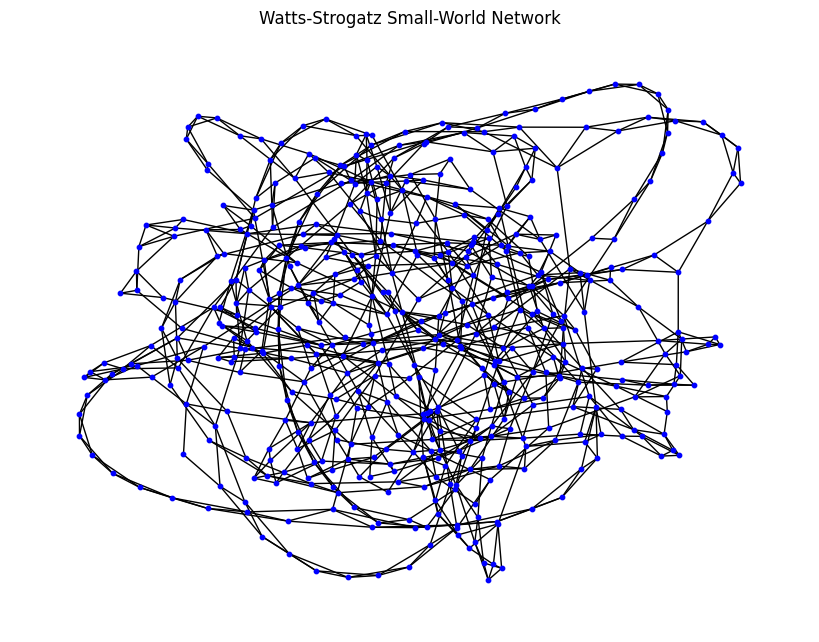

In [10]:
# 張り替えの対象となった枝の一端をランダムに選択
def watts_strogatz(n, k, p):
    # サイクルグラフの作成
    G = create_cycle_graph(n)
    # グラフの拡張
    G = expand_cycle_graph(G, k)
    # 枝の張替え
    G = rewire_graph(G, p)
    return G

# スモールワールド・ネットワークの生成
small_world = watts_strogatz(n=500, k=4, p=0.1)

# グラフの可視化
plt.figure(figsize=(8, 6))
networkx.draw(small_world, node_size=10, node_color='blue')
plt.title("Watts-Strogatz Small-World Network")
plt.show()